# Pasos

#### Input

El input son dos csvs __features.csv__ y __labels.csv__. Tienen que ser similar a los csvs __example_features.csv___ y __example_labels.csv__ que están en __./data__.

Esta notebook va a levantar los csvs que tengan ese nombre y va a entrenar el modelo que luego se usará para predecir.

Si se quiere hacer una prueba para ver cómo funciona se puede cambiar el nombre de los csvs example a features.csv y a labels.csv respectivamente.

#### Cómo Correr la notebook

Desde una terminal hay que ejecutar:

$ jupyter nbconvert --execute churn_model_train.ipynb

#### Output

Esta notebook crea un csv __test_results.csv__ en la carpeta __./data__ que contiene los resultados del test set para calcular métricas.

In [1]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
features = pd.read_csv('./data/features.csv')
clientes = pd.read_csv('./data/labels.csv') # 1 = Cancelado, 0 = Vigente

In [3]:
test_ids = set(clientes.idclientecrm.sample(frac = 0.15, random_state = 1))
features = features.set_index('idclientecrm')
clientes = clientes.set_index('idclientecrm')

In [4]:
clientes_test = clientes[clientes.index.isin(test_ids)].copy()

In [5]:
# train set
clientes_train = clientes[~clientes.index.isin(test_ids)]
features_train = features[~features.index.isin(test_ids)]

### Definición y entrenamiento

In [6]:
model = XGBClassifier(learning_rate=0.1,n_estimators=100)
model = model.fit(features_train, clientes_train.squeeze())
model.save_model("./data/models/xgb.model")

In [7]:
clientes_test['pred'] = model.predict(features[features.index.isin(test_ids)])
clientes_test['correct'] = (clientes_test['pred']==clientes_test['Status Cliente'])
clientes_test['weight'] = model.predict_proba(features[features.index.isin(test_ids)]).max(axis = 1)
clientes_test = clientes_test.sort_values('weight', ascending = False)

In [9]:
clientes_test.to_csv('./data/test_results.csv')

### SHAP

In [10]:
xgb.__version__

'1.0.0'

In [11]:
import shap

In [12]:
shap_values = shap.TreeExplainer(model).shap_values(features_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


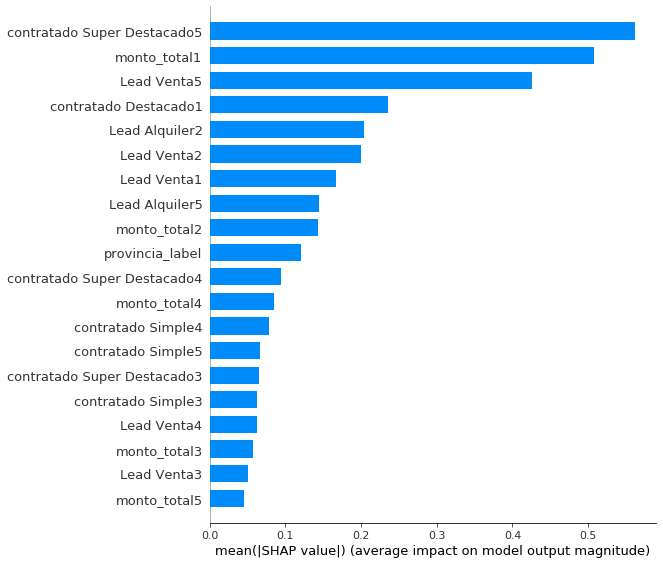

In [13]:
shap.summary_plot(shap_values, features_train, plot_type="bar")

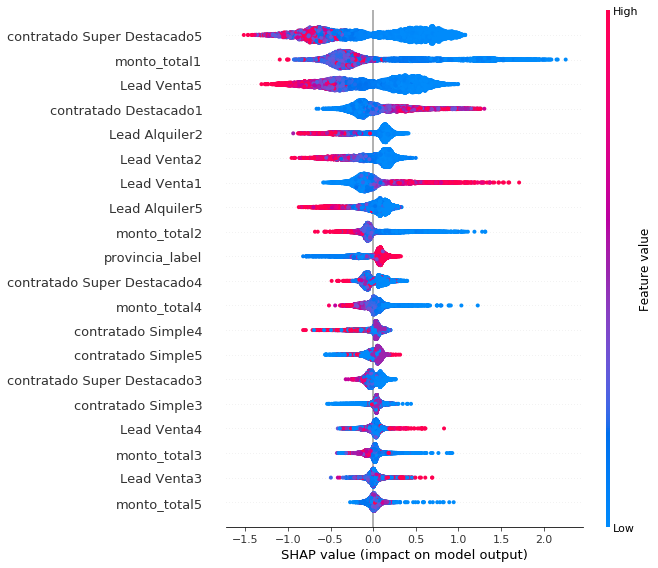

In [14]:
shap.summary_plot(shap_values, features_train)